In [4]:
import pandas as pd

In [5]:
teams = pd.read_csv("teams.csv")

In [6]:
teams = pd.read_csv("teams.csv")


In [7]:
teams = teams[["team", "country", "year", "athletes", "age", "medals", "prev_medals"]]

In [8]:
teams

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0,0.0
2140,ZIM,Zimbabwe,2004,14,25.1,3,0.0
2141,ZIM,Zimbabwe,2008,16,26.1,4,3.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0


In [9]:
teams.head()

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0


In [10]:
teams.corr(numeric_only=True)["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
medals         1.000000
prev_medals    0.920048
Name: medals, dtype: float64

In [11]:
import seaborn as sns

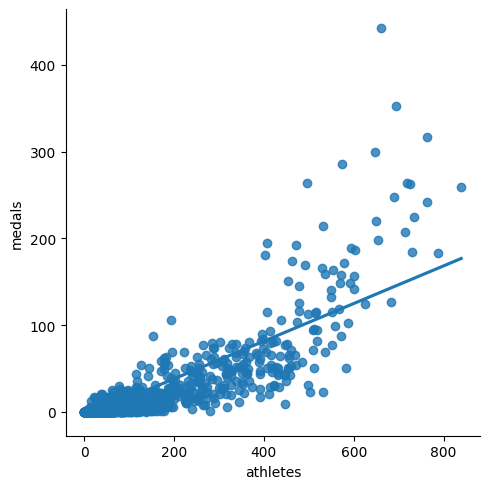

In [12]:
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

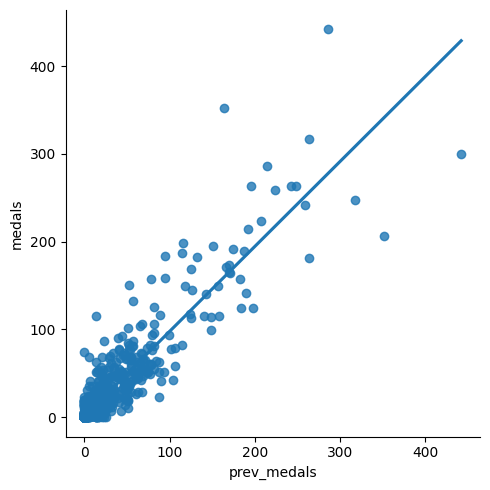

In [13]:
sns.lmplot(x="prev_medals", y="medals", data=teams, fit_reg=True, ci=None)

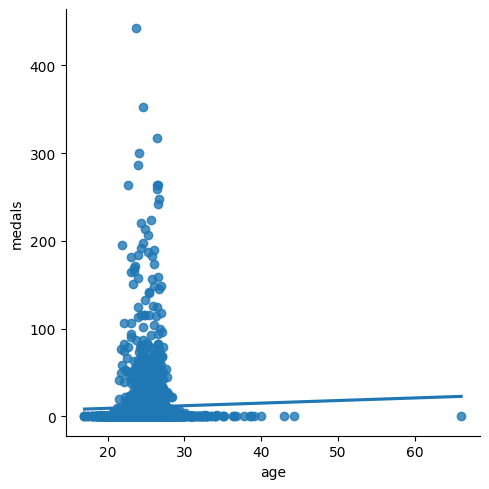

In [14]:
sns.lmplot(x="age", y="medals", data=teams, fit_reg=True,ci=None)

<Axes: ylabel='Frequency'>

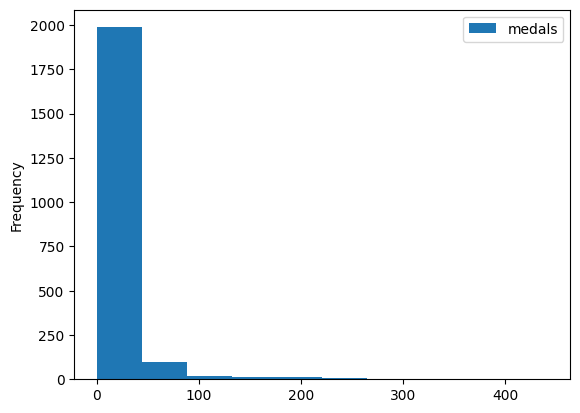

In [15]:
teams.plot.hist(y="medals")

<Axes: title={'center': 'Distribution of Medals'}, ylabel='Frequency'>

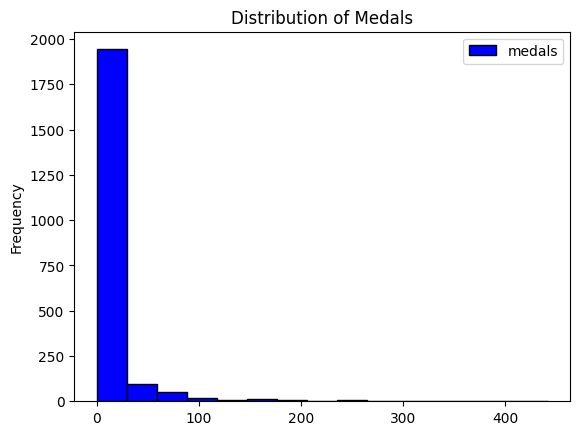

In [16]:
teams.plot.hist(y="medals", bins=15, color='blue', edgecolor='black', title="Distribution of Medals")

In [17]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,medals,prev_medals
19,ALB,Albania,1992,9,25.3,0,NaN
26,ALG,Algeria,1964,7,26.0,0,NaN
39,AND,Andorra,1976,3,28.3,0,NaN
50,ANG,Angola,1980,17,17.4,0,NaN
59,ANT,Antigua and Barbuda,1976,17,23.2,0,NaN
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,0,NaN
2103,YAR,North Yemen,1984,3,27.7,0,NaN
2105,YEM,Yemen,1992,8,19.6,0,NaN
2112,YMD,South Yemen,1988,5,23.6,0,NaN


In [18]:
teams = teams.dropna()

In [19]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [20]:
train.shape

(1609, 7)

In [21]:
test.shape

(405, 7)

In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [23]:
predictors = ["athletes", "prev_medals"]
target = "medals"

In [24]:
reg.fit(train[predictors], train["medals"])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
predictions = reg.predict(test[predictors])

In [26]:
test["predictions"] = predictions

In [27]:
test

,team,country,year,athletes,age,medals,prev_medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1,1.0,-0.961221
7,AFG,Afghanistan,2016,3,24.7,0,1.0,-1.176333
24,ALB,Albania,2012,10,25.7,0,0.0,-1.425032
25,ALB,Albania,2016,6,23.7,0,0.0,-1.711847
37,ALG,Algeria,2012,39,24.8,1,2.0,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0,0.0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0,0.0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0,0.0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0,1.505767


In [28]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [29]:
test["predictions"] = test["predictions"].round()

In [30]:
test

,team,country,year,athletes,age,medals,prev_medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1,1.0,0.0
7,AFG,Afghanistan,2016,3,24.7,0,1.0,0.0
24,ALB,Albania,2012,10,25.7,0,0.0,0.0
25,ALB,Albania,2016,6,23.7,0,0.0,0.0
37,ALG,Algeria,2012,39,24.8,1,2.0,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0,0.0,0.0
2131,ZAM,Zambia,2012,7,22.6,0,0.0,0.0
2132,ZAM,Zambia,2016,7,24.1,0,0.0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0,2.0


In [31]:
type(reg)

sklearn.linear_model._base.LinearRegression

In [32]:
from sklearn.metrics import mean_absolute_error

err = mean_absolute_error(test["predictions"], test["medals"])

In [33]:
err

3.2987654320987656

In [34]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [35]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,medals,prev_medals,predictions
2053,USA,United States,2012,689,26.7,248,317.0,285.0
2054,USA,United States,2016,719,26.4,264,248.0,236.0


In [36]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,medals,prev_medals,predictions
907,IND,India,2012,95,26.0,6,3.0,7.0
908,IND,India,2016,130,26.1,2,6.0,12.0


In [37]:
error = (test["medals"] - test["predictions"]).abs()

In [38]:
error

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [39]:
error_by_team = error.groupby(test["team"]).mean()

In [40]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [41]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [42]:
error_ratio = error_by_team / medals_by_team

In [43]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [44]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [45]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

<Axes: ylabel='Frequency'>

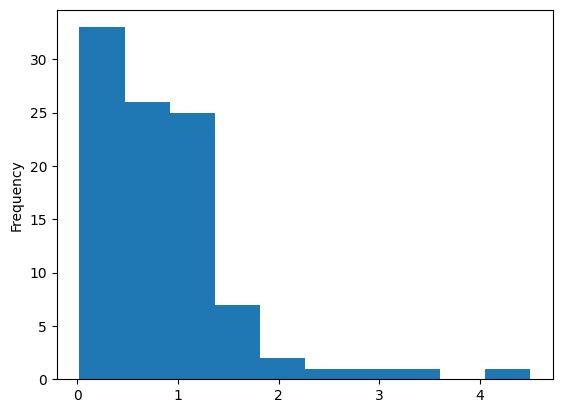

In [46]:
error_ratio.plot.hist()

In [47]:
import numpy as np

print("length:", len(error_ratio))
print("NaNs:", error_ratio.isna().sum())
print("+inf:", np.isposinf(error_ratio).sum())
print("-inf:", np.isneginf(error_ratio).sum())
print("finite count:", np.isfinite(error_ratio).sum())
print(error_ratio.head(20))


length: 97
NaNs: 0
+inf: 0
-inf: 0
finite count: 97
team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
AUT    4.500000
AZE    0.392857
BAH    0.300000
BDI    1.000000
BEL    0.833333
BLR    0.657143
BOT    1.000000
BRA    0.486239
BRN    0.666667
BUL    0.888889
CAN    0.048387
CHN    0.247899
CIV    1.000000
COL    0.437500
CRO    0.542373
dtype: float64


In [48]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

In [49]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64